In [1]:
from google.colab import files

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel ("/content/drive/MyDrive/MLAssignment/Insurance_Updated.xlsx")

**Summarize Data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_days             1000 non-null   int64  
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# List of features to drop
features_to_drop = [
    'policy_state',
    'policy_csl',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'collision_type',
    'incident_severity',
    'authorities_contacted',
    'incident_state',
    'incident_city',
    'incident_location',
    'property_damage',
    'police_report_available',
    'auto_make',
    'auto_model',
    '_c39'
]

# Drop the specified features from the dataframe
df.drop(columns=features_to_drop, inplace=True)

# Now df contains the dataset with the specified features dropped

In [7]:
# Encoding fraud_reported(dependent variable column)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.fraud_reported)
df['fraud_reported'] = le.transform(df.fraud_reported)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Selecting features and target from the DataFrame
selected_features = ['months_as_customer', 'age', 'policy_number', 'policy_bind_days',
                     'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
                     'insured_zip', 'capital-gains', 'capital-loss', 'incident_days',
                     'incident_hour_of_the_day', 'number_of_vehicles_involved',
                     'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
                     'auto_year']  # Remaining variables , 'fraud_reported'

X = df[selected_features]
y = df['fraud_reported']  # Assuming 'fraud_reported' is the target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)

# Fitting a random forest classifier
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

# Computing feature importances
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)

# Sorting feature importances in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Printing feature importances
print("Feature importances:")
print(feature_importances_sorted)


Feature importances:
policy_annual_premium          0.077742
injury_claim                   0.076905
property_claim                 0.076474
policy_number                  0.073038
insured_zip                    0.071361
vehicle_claim                  0.069566
total_claim_amount             0.067864
months_as_customer             0.065695
incident_days                  0.063311
policy_bind_days               0.062369
age                            0.054129
incident_hour_of_the_day       0.048594
auto_year                      0.047168
capital-gains                  0.040213
capital-loss                   0.040147
umbrella_limit                 0.029765
number_of_vehicles_involved    0.018596
policy_deductable              0.017063
dtype: float64


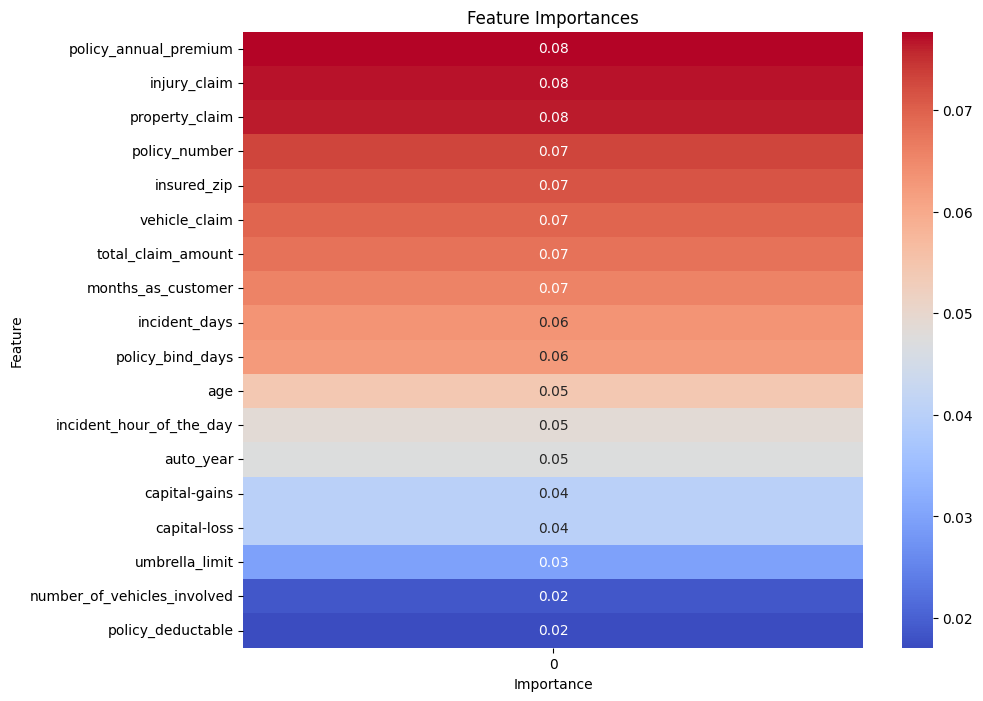

In [9]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# #from sklearn.ensemble
# plt.figure(figsize=(10, 8))
# sns.heatmap(feature_importances_sorted.set_index('Feature'), cmap='coolwarm', annot=True, fmt='.2f')
# plt.title('Feature Importances')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming feature_importances_sorted is already computed and sorted
plt.figure(figsize=(10, 8))
sns.heatmap(feature_importances_sorted.to_frame(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [10]:
# List of features to drop based as they have less feature importance
features_to_drop = ['umbrella_limit', 'number_of_vehicles_involved', 'policy_deductable']

# Drop specified features from the DataFrame
df.drop(columns=features_to_drop, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   months_as_customer        1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   policy_number             1000 non-null   int64  
 3   policy_bind_days          1000 non-null   int64  
 4   policy_annual_premium     1000 non-null   float64
 5   insured_zip               1000 non-null   int64  
 6   capital-gains             1000 non-null   int64  
 7   capital-loss              1000 non-null   int64  
 8   incident_days             1000 non-null   int64  
 9   incident_hour_of_the_day  1000 non-null   int64  
 10  bodily_injuries           1000 non-null   int64  
 11  witnesses                 1000 non-null   int64  
 12  total_claim_amount        1000 non-null   int64  
 13  injury_claim              1000 non-null   int64  
 14  property_

In [12]:
from scipy import stats

# Assume df is your DataFrame

# Calculate Z-score for each data point
z_scores = stats.zscore(df)

# Define threshold for outliers
threshold = 3  # Can be adjusted based on the level of sensitivity desired

# Find outliers
outliers = df[(z_scores > threshold).any(axis=1)]


In [13]:
print("Outliers detected using Z-score method:")
print(outliers)


Outliers detected using Z-score method:
     months_as_customer  age  policy_number  policy_bind_days  \
229                 154   37         241562              5185   
500                   1   29         357949              6530   

     policy_annual_premium  insured_zip  capital-gains  capital-loss  \
229                2047.59       439269              0        -67800   
500                 854.58       612826          52200             0   

     incident_days  incident_hour_of_the_day  bodily_injuries  witnesses  \
229           3378                         2                0          3   
500           3386                        15                2          3   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
229               79530         14460            7230          57840   
500               86790          7890           23670          55230   

     auto_year  fraud_reported  
229       2000               0  
500       2003               0  


In [14]:
df = df[(z_scores <= threshold).all(axis=1)]
#remove outliers

In [15]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.fraud_reported == 0]
df_minority = df[df.fraud_reported == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=1234) # for reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.fraud_reported.value_counts()
df = df_upsampled

In [16]:
#df after removing outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1502 entries, 2 to 135
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   months_as_customer        1502 non-null   int64  
 1   age                       1502 non-null   int64  
 2   policy_number             1502 non-null   int64  
 3   policy_bind_days          1502 non-null   int64  
 4   policy_annual_premium     1502 non-null   float64
 5   insured_zip               1502 non-null   int64  
 6   capital-gains             1502 non-null   int64  
 7   capital-loss              1502 non-null   int64  
 8   incident_days             1502 non-null   int64  
 9   incident_hour_of_the_day  1502 non-null   int64  
 10  bodily_injuries           1502 non-null   int64  
 11  witnesses                 1502 non-null   int64  
 12  total_claim_amount        1502 non-null   int64  
 13  injury_claim              1502 non-null   int64  
 14  property_claim

In [17]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan
import numpy as np
df.replace('?', np.nan, inplace = True)

In [18]:
# missing values
df.isna().sum()

months_as_customer          0
age                         0
policy_number               0
policy_bind_days            0
policy_annual_premium       0
insured_zip                 0
capital-gains               0
capital-loss                0
incident_days               0
incident_hour_of_the_day    0
bodily_injuries             0
witnesses                   0
total_claim_amount          0
injury_claim                0
property_claim              0
vehicle_claim               0
auto_year                   0
fraud_reported              0
dtype: int64

In [19]:
# import missingno as msno

# msno.bar(df)
# plt.show()

In [20]:
df=df.dropna()

In [21]:
df.isna().sum()

months_as_customer          0
age                         0
policy_number               0
policy_bind_days            0
policy_annual_premium       0
insured_zip                 0
capital-gains               0
capital-loss                0
incident_days               0
incident_hour_of_the_day    0
bodily_injuries             0
witnesses                   0
total_claim_amount          0
injury_claim                0
property_claim              0
vehicle_claim               0
auto_year                   0
fraud_reported              0
dtype: int64

In [22]:
from scipy import stats
import pandas as pd

# Convert Timestamp columns to numeric data types or exclude them from z-score calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Calculate Z-score for each data point
z_scores = stats.zscore(df_numeric)

# Define threshold for outliers
threshold = 3  # Can be adjusted based on the level of sensitivity desired

# Find outliers
outliers = df[(z_scores > threshold).any(axis=1)]
print("Outliers detected using Z-score method:")
print(outliers)

# Remove outliers
df = df[(z_scores <= threshold).all(axis=1)]


Outliers detected using Z-score method:
     months_as_customer  age  policy_number  policy_bind_days  \
301                 107   31         714929             10728   
591                  43   43         528385              9650   
591                  43   43         528385              9650   
163                 112   30         346940              7879   
163                 112   30         346940              7879   
163                 112   30         346940              7879   
591                  43   43         528385              9650   
163                 112   30         346940              7879   
591                  43   43         528385              9650   

     policy_annual_premium  insured_zip  capital-gains  capital-loss  \
301                1018.73       469646          20000        -82700   
591                1320.39       604861              0             0   
591                1320.39       604861              0             0   
163                11

In [23]:
#Removing Class Imbalance
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.fraud_reported == 0]
df_minority = df[df.fraud_reported == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=1234) # for reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.fraud_reported.value_counts()
df = df_upsampled

In [24]:
#Preprocessed Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 2 to 253
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   months_as_customer        1500 non-null   int64  
 1   age                       1500 non-null   int64  
 2   policy_number             1500 non-null   int64  
 3   policy_bind_days          1500 non-null   int64  
 4   policy_annual_premium     1500 non-null   float64
 5   insured_zip               1500 non-null   int64  
 6   capital-gains             1500 non-null   int64  
 7   capital-loss              1500 non-null   int64  
 8   incident_days             1500 non-null   int64  
 9   incident_hour_of_the_day  1500 non-null   int64  
 10  bodily_injuries           1500 non-null   int64  
 11  witnesses                 1500 non-null   int64  
 12  total_claim_amount        1500 non-null   int64  
 13  injury_claim              1500 non-null   int64  
 14  property_claim